In [1]:
%load_ext autoreload
%autoreload 2

from pangolin.interface import *
#from pangolin import new_infer as infer
import numpy as np
from pangolin.loops import Loop, VMapRV
#from pangolin import transforms

from pangolin.transforms import transforms, local_transforms, normal_normal, normal_vmap_normal

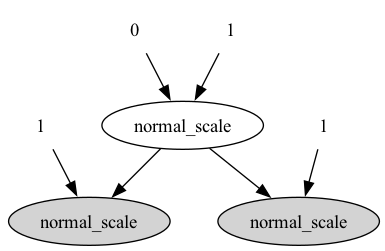

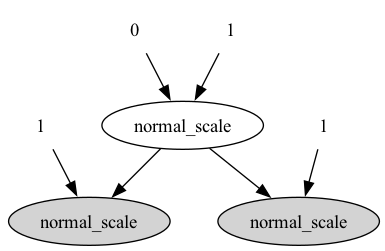

In [31]:
# single layer, unrolled

M = 2

θ = normal(0,1)
z = [normal(θ,1) for m in range(M)]
#print_upstream(z)

tforms = [normal_normal.normal_normal]

vars = [θ,z]
given = z
vals = [np.random.rand() for m in range(M)]

new_vars,new_given,new_vals = transforms.apply_transforms(tforms,vars,given,vals)

[new_θ,new_z] = new_vars

display(viz_upstream([θ,z],given))

display(viz_upstream([new_θ,new_z],new_given))

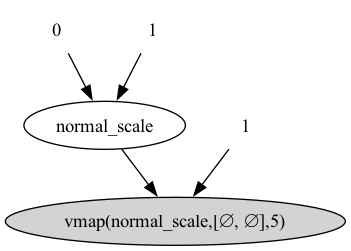

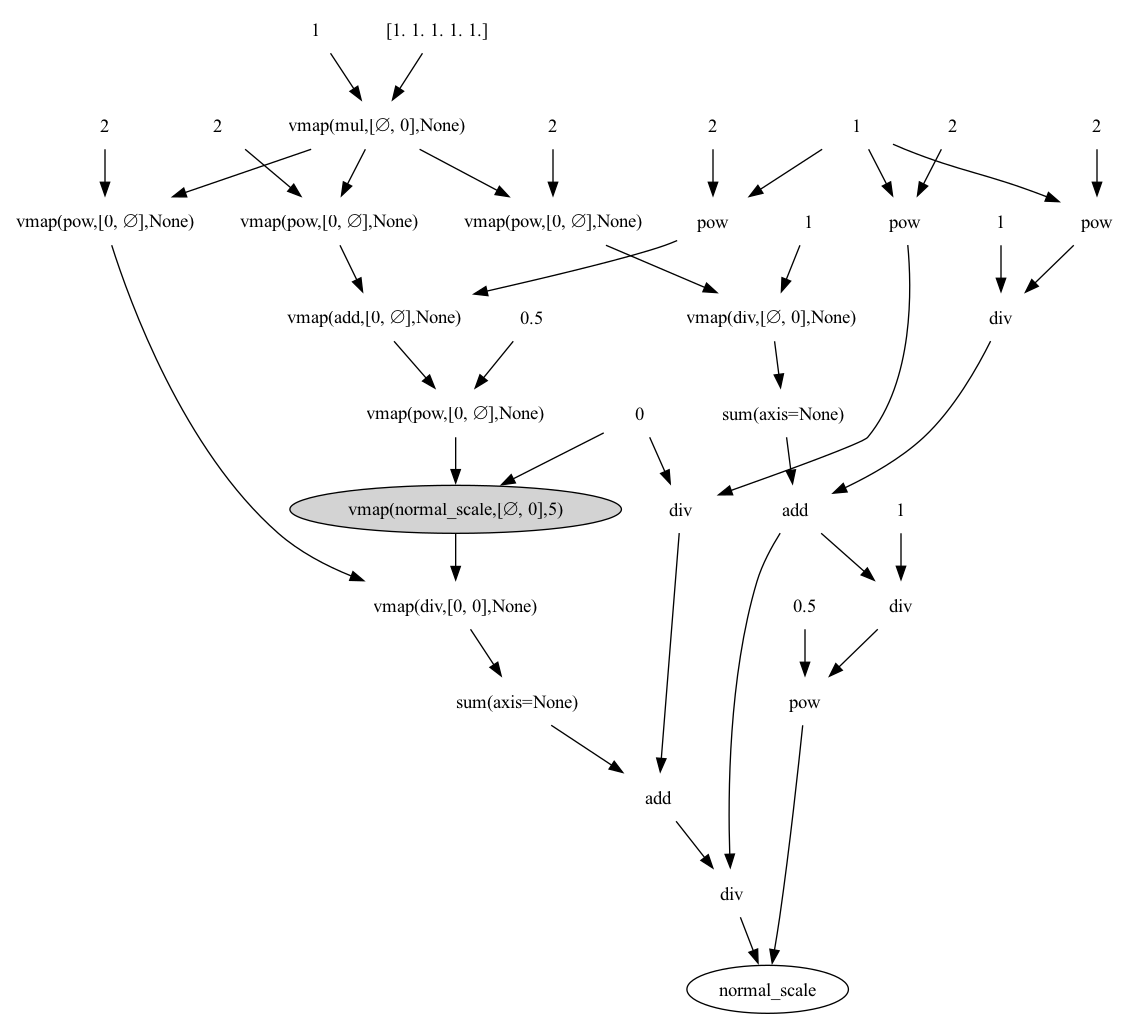

In [7]:
# single layer

M = 5

θ = normal(0,1)
z = VMapRV()
with Loop(M) as m:
    z[m] = normal(θ,1)

tforms = [normal_vmap_normal.normal_vmap_normal]


vars = [θ,z]
given = z
vals = np.random.randn(M)

new_vars,new_given,new_vals = transforms.apply_transforms(tforms,vars,given,vals)
[new_θ,new_z] = new_vars
display(viz_upstream([θ,z],[z]))
display(viz_upstream([new_θ,new_z],[new_given]))

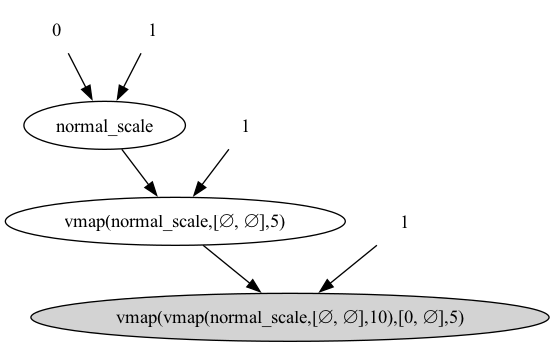

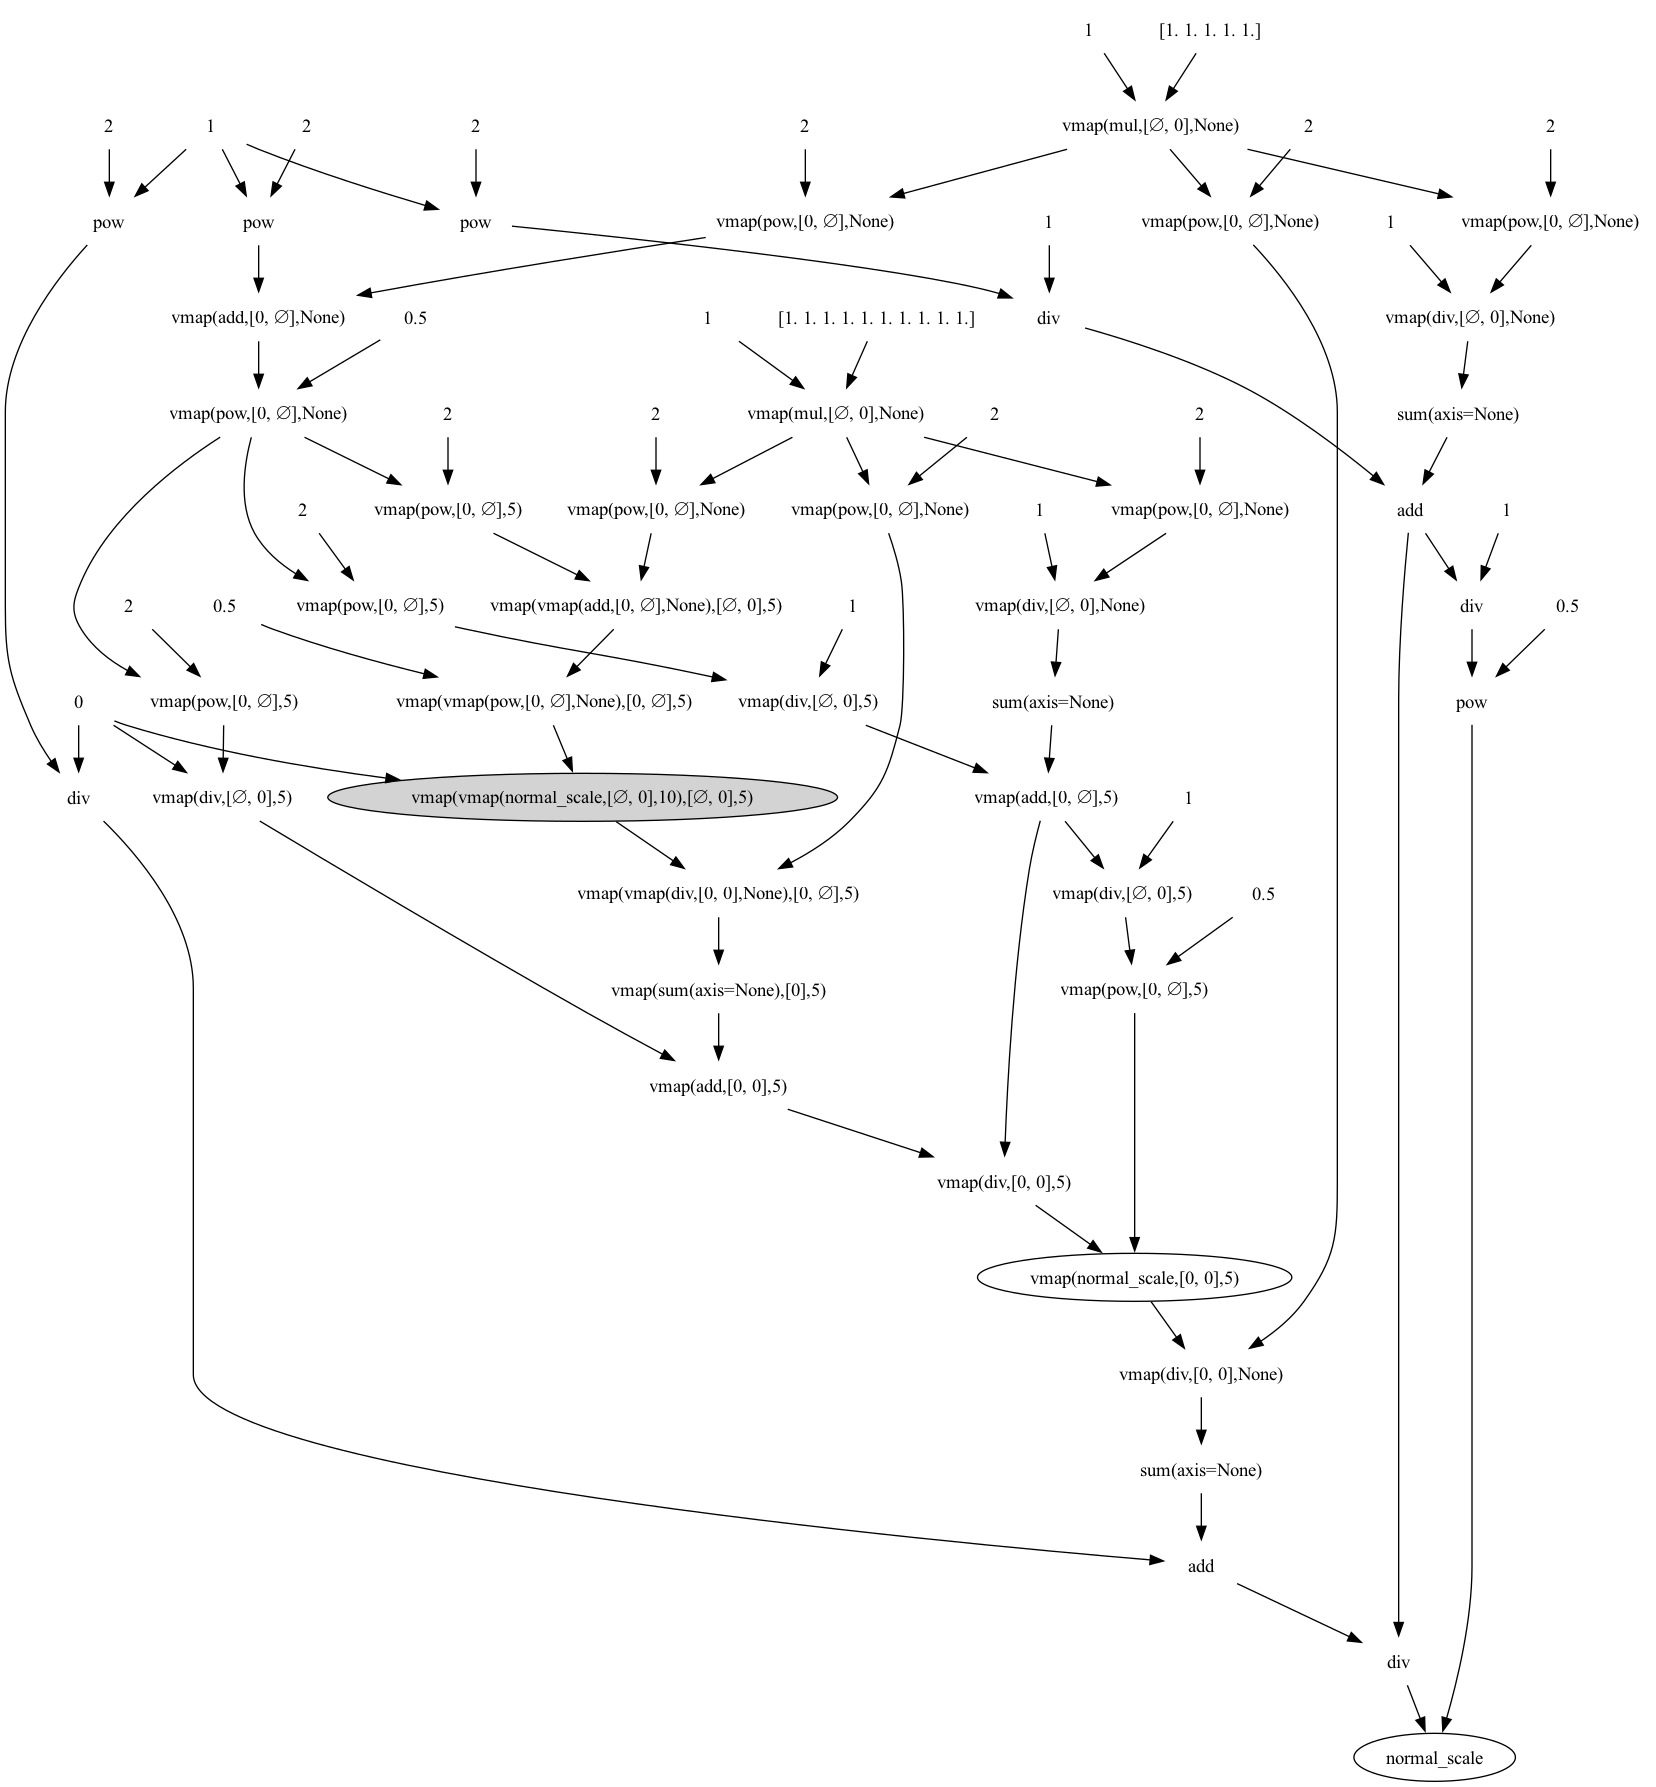

In [11]:
# double layer

M = 5
N = 10

θ = normal(0,1)
z = VMapRV()
x = VMapRV()
with Loop(M) as m:
    z[m] = normal(θ,1)
    with Loop(N) as n:
        x[m,n] = normal(z[m],1)

#viz_upstream(x,[x])

vars = [θ,z,x]
given = x
vals = np.random.randn(M,N)

new_vars,new_given,new_vals = transforms.apply_transforms(tforms,vars,given,vals)
[new_θ,new_z,new_x] = new_vars
display(viz_upstream([θ,z,x],[x]))
display(viz_upstream([new_θ,new_z,new_x],[new_given]))